### 1. 
    1. Cylinders    - Raw or one-hot or standardize
        A raw representation in this case makes sense since the number of cylinders of a vehicle does indeed impact its fuel efficiency in miles per gallon and there may be a relationship between the two.
        A one hot encoding makes sense since the number of cylinders make sense because the number of cylinders in different vehicles does not vary by a lot and we want to avoid giving a vehicle with higher cylinders more importance than a vehicle with lesser cylinders
        We can also standardize this features since we are standardizing other numeric features so that this raw value does not take precedence over the others. 

        But overall, using a raw representation is better than one-hot since we want the model to learn the relationship between the number of cylinders and the miles-per-gallon fuel consumption in a correct manner. Moreover, there is some form of order in the number of cylinders and hence raw is better than one-hot encoding
        Moreover, standardizing is even better than taking just the raw data since it avoids the problem of giving the cylinders feature too much importance. 

    2. Displacement - Standardize since the values of this feature are bigger than the values of some other features. There are large differences in the range of values this feature has and the range of values that another feature like number of cylinders has.

    3. Horsepower   - Standardize since the values of this feature are bigger than the values of some other features. There are large differences in the range of values this feature has and the range of values that another feature like number of cylinders has.

    4. Weight       - Standardize since the values of this feature are bigger than the values of some other features. There are large differences in the range of values this feature has and the range of values that another feature like number of cylinders has.

    5. Acceleration - Standardize since the values of this feature are bigger than the values of some other features. There are large differences in the range of values this feature has and the range of values that another feature like number of cylinders has.

    6. Model Year   -  Standardize or raw
    Standardize since the values of this feature are bigger than the values of some other features. There are large differences in the range of values this feature has and the range of values that another feature like number of cylinders has.

    We could also use a raw encoding since we can expect that years with larger values (hence newer cars), have better miles per gallon

    Standardize is better overall to avoid giving year too much importance

    7. Origin       - One-hot encoding makes sense so that the value 3 in the origin does not take greater importance than the value 1 since these values are meaningless in terms of the actual origin and they do not actual have any order. 

### 2. 
Car name, a textual feature can be transformed into a feature which can be used by the logistic regression algorithm by converting it into some form of numerical value. This can be done in many ways:
+ Assigning unique label; however this is inconvenient since too many labels
+ One hot encoding: Assigns one hot representation to every possible car name. This can lead to very high dimensional one hot vectors
+ Word embeddings: Using techniques like word2vec we can figure semantics and get to know underlying patterns in the car names. For eg: Perhaps we uncover that cars made by a particular company are more fuel efficient than other cars. 


### 3. 
Car name, a textual feature can be transformed into a feature which can be used by the decision tree algorithm by converting it into some form of numerical value similar to the above way. This can be done by word embeddings or one hot encodings. However, one hot encoding is not suggested since it can lead to performance issues when the dimensions become too high. However, it does not matter to a DT whether the features are ordinal or categorical we could also use labels to encode name without fear or ordinal relationship being assumed.



### 4. 
For this dataset car name is not that useful if we consider the name as a whole since there are too many unique names for us to extract any meaningful information. However, if we consider just the manufacturer name of the car then we could perhaps uncover some underlying pattern where cars made by a particular company are more fuel efficient than cars made by another company.




In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
data = pd.read_csv("auto-mpg.tsv", sep='\t')

X = data.drop('mpg', axis=1)
X.dropna(inplace=True)                  #remove that one blank row
X.reset_index(drop=True, inplace=True) 
Y = data['mpg']
Y.dropna(inplace=True)                  #remove that one blank row
Y.reset_index(drop=True, inplace=True)
type(X), type(Y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [3]:
X = X.filter(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'], axis = 1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0
1,8.0,307.0,200.0,4376.0,15.0,70.0,1.0
2,8.0,360.0,215.0,4615.0,14.0,70.0,1.0
3,8.0,318.0,210.0,4382.0,13.5,70.0,1.0
4,8.0,350.0,180.0,3664.0,11.0,73.0,1.0


In [4]:
Y = Y.values.reshape(-1,1)
X.corr() #unstandardized and one hot stuff not done

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
cylinders,1.000000,-0.238708,-0.709525,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.238708,1.000000,0.084837,-0.381734,0.173959,0.012157,0.368264
horsepower,-0.709525,0.084837,1.000000,-0.643922,0.402398,0.223194,0.352895
weight,0.897527,-0.381734,-0.643922,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,0.173959,0.402398,-0.416839,1.000000,0.290316,0.212746
model_year,-0.345647,0.012157,0.223194,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,0.368264,0.352895,-0.585005,0.212746,0.181528,1.000000


In [5]:
Y.shape

(392, 1)

In [6]:
stand_fts = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
onehot_fts = ['origin']

# don't really need to standardize for decision tree but it says based on (1) so I'm doing it
# could have written own functions to standardize and one hot encode but it wasn't mentioned in the question so I'm using sklearn
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse_output=False)

#col trans applies the transformations to particular feature columns
transformed = ColumnTransformer(transformers = [ ('numeric', scaler, stand_fts),('categorical', one_hot_encoder, onehot_fts)])
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

X_transformed = transformed.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin1', 'origin2', 'origin3'])



### 5. Final Feature Matrix

In [7]:
display(X_transformed_df)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin1,origin2,origin3
0,1.483947,-0.279256,-0.948157,2.068110,1.073795,-1.625315,1.0,0.0,0.0
1,1.483947,-0.269324,-0.927177,1.648456,-0.196464,-1.625315,1.0,0.0,0.0
2,1.483947,-0.093854,-0.882220,1.930190,-0.559396,-1.625315,1.0,0.0,0.0
3,1.483947,-0.232906,-0.897206,1.655529,-0.740861,-1.625315,1.0,0.0,0.0
4,1.483947,-0.126962,-0.987120,0.809149,-1.648189,-0.809884,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
387,-0.864014,1.693954,-0.087980,-0.757480,2.961037,1.092789,0.0,1.0,0.0
388,-0.864014,1.925707,0.031906,-0.999134,3.287676,1.636410,0.0,1.0,0.0
389,-0.864014,1.693954,-0.087980,-1.052181,2.235175,1.092789,0.0,1.0,0.0
390,-0.864014,1.727062,0.481476,-1.329199,-0.631982,1.092789,0.0,0.0,1.0


In [8]:
X_transformed_df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin1,origin2,origin3
cylinders,1.000000,-0.238708,-0.709525,0.897527,-0.504683,-0.345647,0.610494,-0.352324,-0.404209
displacement,-0.238708,1.000000,0.084837,-0.381734,0.173959,0.012157,-0.362045,0.143361,0.301614
horsepower,-0.709525,0.084837,1.000000,-0.643922,0.402398,0.223194,-0.354914,0.157778,0.279399
weight,0.897527,-0.381734,-0.643922,1.000000,-0.416839,-0.309120,0.600978,-0.293841,-0.447929
acceleration,-0.504683,0.173959,0.402398,-0.416839,1.000000,0.290316,-0.258224,0.208298,0.115020
model_year,-0.345647,0.012157,0.223194,-0.309120,0.290316,1.000000,-0.136065,-0.037745,0.199841
origin1,0.610494,-0.362045,-0.354914,0.600978,-0.258224,-0.136065,1.000000,-0.591434,-0.648583
origin2,-0.352324,0.143361,0.157778,-0.293841,0.208298,-0.037745,-0.591434,1.000000,-0.230157
origin3,-0.404209,0.301614,0.279399,-0.447929,0.115020,0.199841,-0.648583,-0.230157,1.000000


### 6. Cross validation

In [9]:
def cross_validation(X, Y, DT,k = 10):
    np.random.seed(0)
    chunksize = len(X) // k
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    all_results = []

    for foldnum in range(k):
        test_indices = indices[foldnum * chunksize:(foldnum + 1) * chunksize]
        train_indices = np.setdiff1d(indices, test_indices)         #set difference (unique values in indices which aren't in test_indices)
        X_train = X[train_indices]
        Y_train = Y[train_indices]
        X_test = X[test_indices]
        Y_test = Y[test_indices]
        DT.fit(X_train, Y_train)
        Y_pred = DT.predict(X_test)
        all_results.append(accuracy_score(Y_test, Y_pred))
    return all_results

    
    

In [10]:
gini = DecisionTreeClassifier(criterion='gini')
entropy = DecisionTreeClassifier(criterion='entropy')
log_loss = DecisionTreeClassifier(criterion='log_loss')

npX_transformed = X_transformed_df.to_numpy()
gini_results = cross_validation(npX_transformed, Y, gini, 10)
entropy_results = cross_validation(npX_transformed, Y, entropy, 10)
log_loss_results = cross_validation(npX_transformed, Y, log_loss, 10)
print("Gini: ", np.array(gini_results).mean())
print("Entropy: ", np.array(entropy_results).mean())
print("Log Loss: ", np.array(log_loss_results).mean())


Gini:  0.9025641025641027
Entropy:  0.9051282051282052
Log Loss:  0.9051282051282052


### 7. Other params and better tree

In [11]:
#change max_depth = 3
gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
log_loss = DecisionTreeClassifier(criterion='log_loss', max_depth = 3)

npX_transformed = X_transformed_df.to_numpy()
gini_results = cross_validation(npX_transformed, Y, gini, 10)
entropy_results = cross_validation(npX_transformed, Y, entropy, 10)
log_loss_results = cross_validation(npX_transformed, Y, log_loss, 10)
print("Gini: ", np.array(gini_results).mean())
print("Entropy: ", np.array(entropy_results).mean())
print("Log Loss: ", np.array(log_loss_results).mean())

Gini:  0.9076923076923078
Entropy:  0.9230769230769231
Log Loss:  0.9230769230769231


In [12]:
#change max_depth = 4
gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
log_loss = DecisionTreeClassifier(criterion='log_loss', max_depth = 3)

npX_transformed = X_transformed_df.to_numpy()
gini_results = cross_validation(npX_transformed, Y, gini, 10)
entropy_results = cross_validation(npX_transformed, Y, entropy, 10)
log_loss_results = cross_validation(npX_transformed, Y, log_loss, 10)
print("Gini: ", np.array(gini_results).mean())
print("Entropy: ", np.array(entropy_results).mean())
print("Log Loss: ", np.array(log_loss_results).mean())

Gini:  0.9076923076923078
Entropy:  0.9230769230769231
Log Loss:  0.9230769230769231


In [13]:
#change max_depth = 4
gini = DecisionTreeClassifier(criterion='gini', max_depth = 4)
entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
log_loss = DecisionTreeClassifier(criterion='log_loss', max_depth = 4)

npX_transformed = X_transformed_df.to_numpy()
gini_results = cross_validation(npX_transformed, Y, gini, 10)
entropy_results = cross_validation(npX_transformed, Y, entropy, 10)
log_loss_results = cross_validation(npX_transformed, Y, log_loss, 10)
print("Gini Result: ", np.array(gini_results).mean())
print("Entropy Result: ", np.array(entropy_results).mean())
print("Log Loss Result: ", np.array(log_loss_results).mean())

Gini Result:  0.9205128205128206
Entropy Result:  0.9128205128205129
Log Loss Result:  0.9128205128205129


In [14]:
param_grid = {
    'max_depth': [2, 3, 5, 7, 10, 12],
    'min_samples_split': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid_search.fit(npX_transformed, Y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

### Best tree according to GridSearchCV

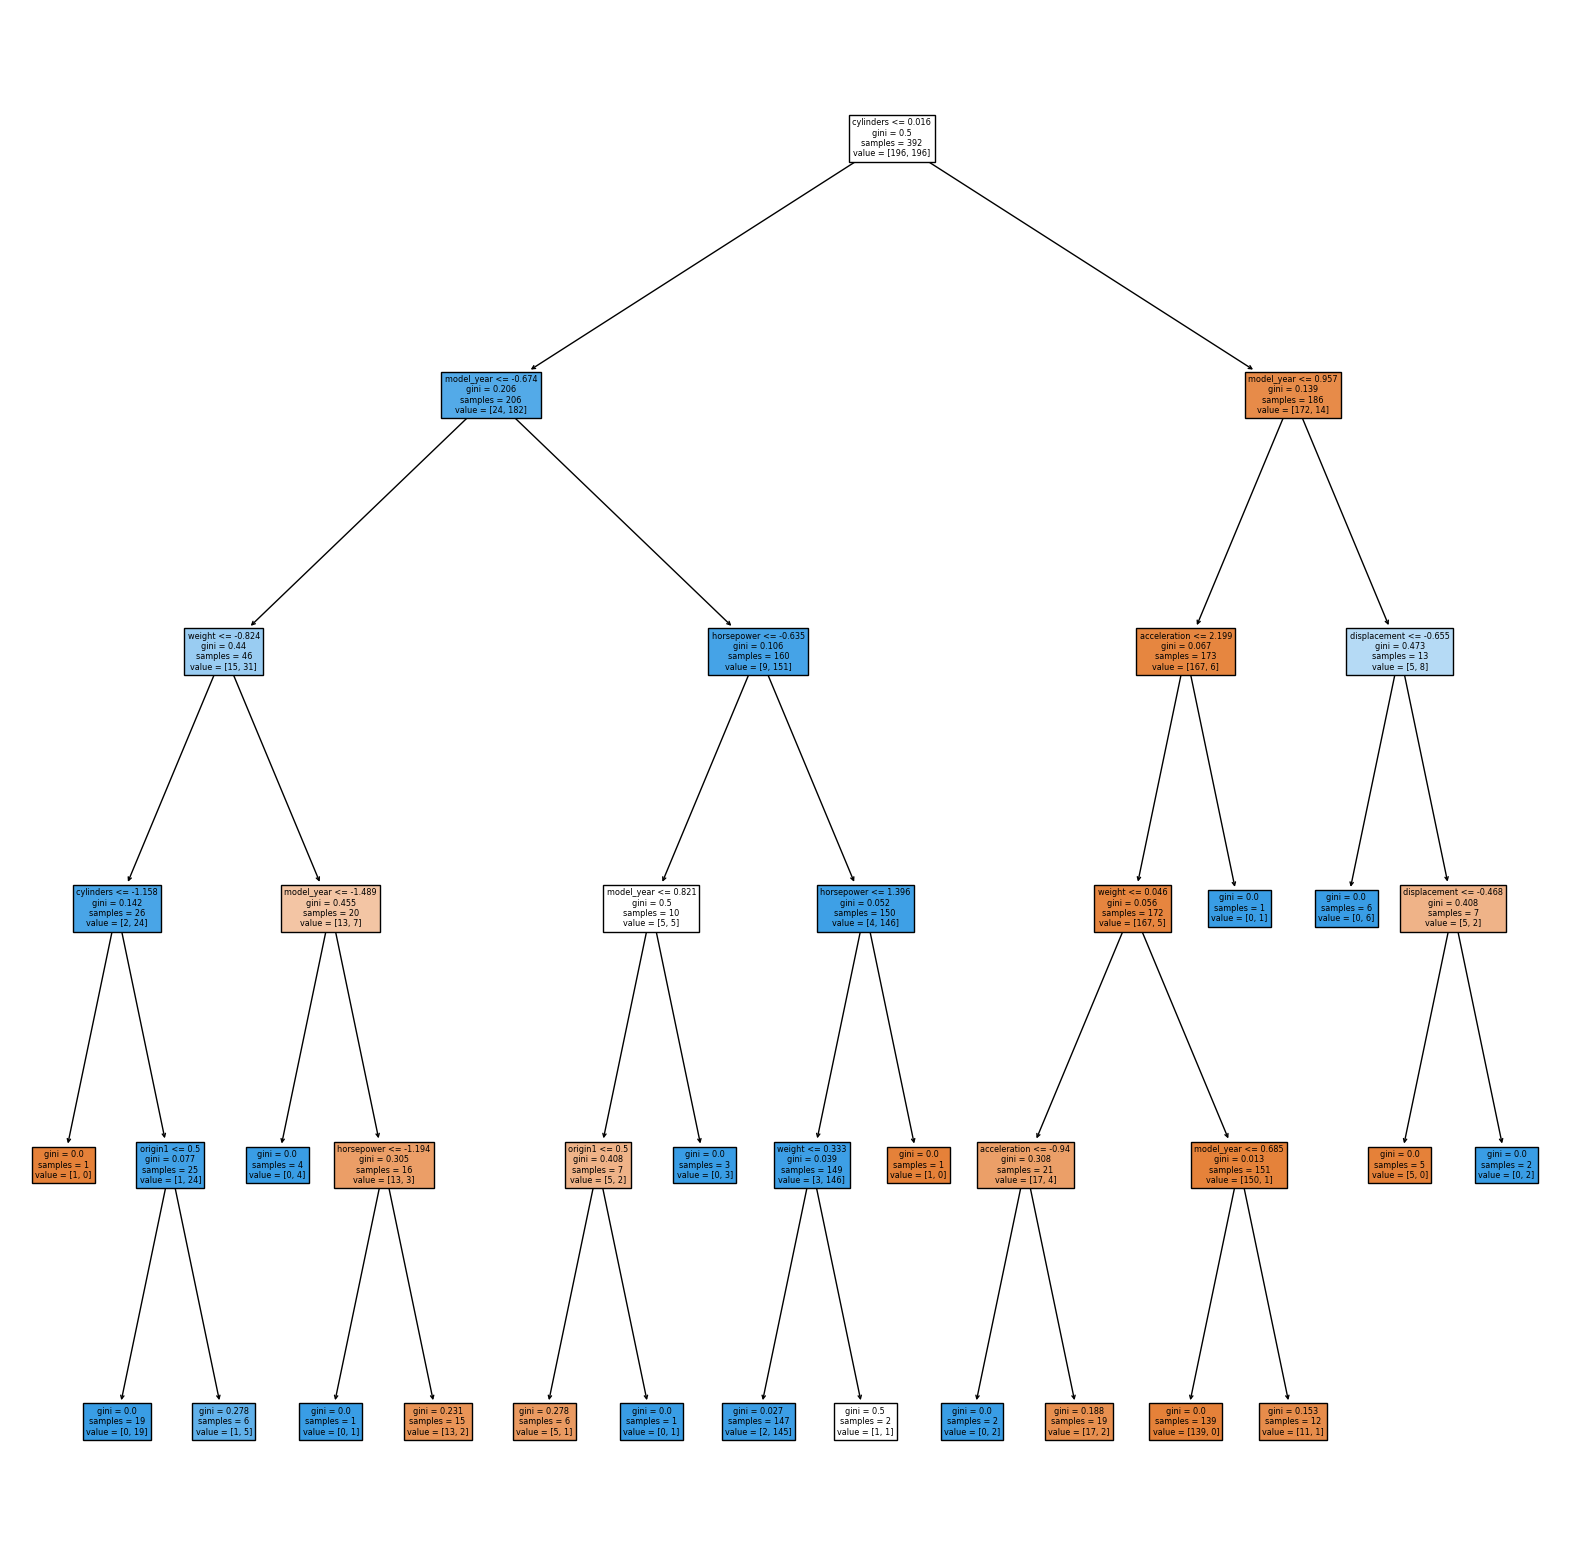

In [15]:
plt.figure(figsize=(20,20))
tree.plot_tree(best_model, filled=True, feature_names=X_transformed_df.columns)
plt.show()

In [16]:
print(best_params), print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.9210897435897436


(None, None)

In [17]:
res = pd.DataFrame(grid_search.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000677,0.000128,0.000324,0.000051,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.925,0.925,...,0.974359,0.974359,0.923077,0.897436,0.871795,0.897436,0.692308,0.905513,0.078747,105
1,0.000590,0.000012,0.000290,0.000008,2,1,10,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.925,0.925,...,0.974359,0.974359,0.923077,0.897436,0.871795,0.897436,0.692308,0.905513,0.078747,105
2,0.000613,0.000033,0.000313,0.000038,2,1,15,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.925,0.925,...,0.974359,0.974359,0.923077,0.897436,0.871795,0.897436,0.692308,0.905513,0.078747,105
3,0.000616,0.000061,0.000298,0.000021,2,1,20,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.925,0.925,...,0.974359,0.974359,0.923077,0.897436,0.871795,0.897436,0.692308,0.905513,0.078747,105
4,0.000620,0.000029,0.000315,0.000040,2,1,25,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.925,0.925,...,0.974359,0.974359,0.923077,0.897436,0.871795,0.897436,0.692308,0.905513,0.078747,105


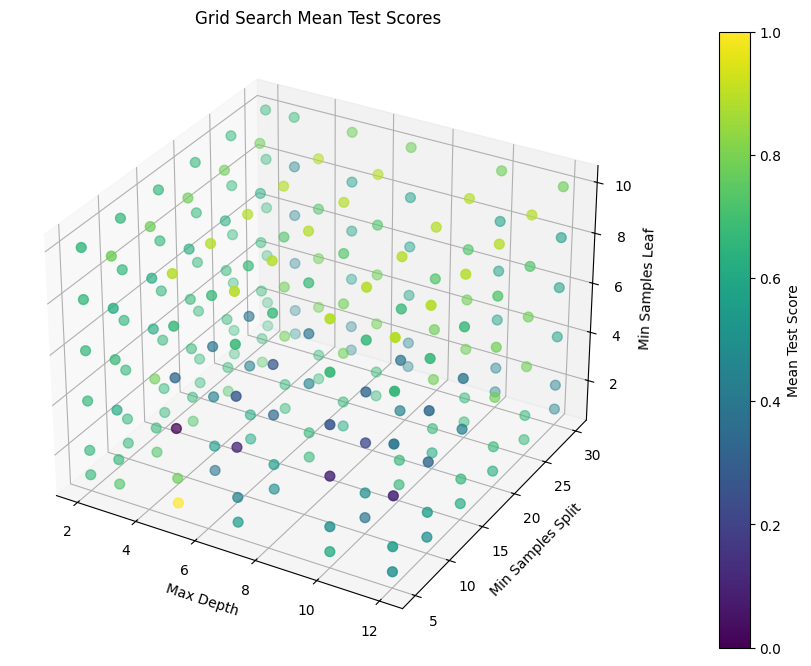

In [18]:
params = res[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(params['param_max_depth'], params['param_min_samples_split'], params['param_min_samples_leaf'], c=params['mean_test_score'], cmap='viridis', s=50)

ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Min Samples Leaf')
ax.set_title('Grid Search Mean Test Scores')
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis', s=50), ax=ax, pad=0.1)
cbar.set_label('Mean Test Score')

plt.show()

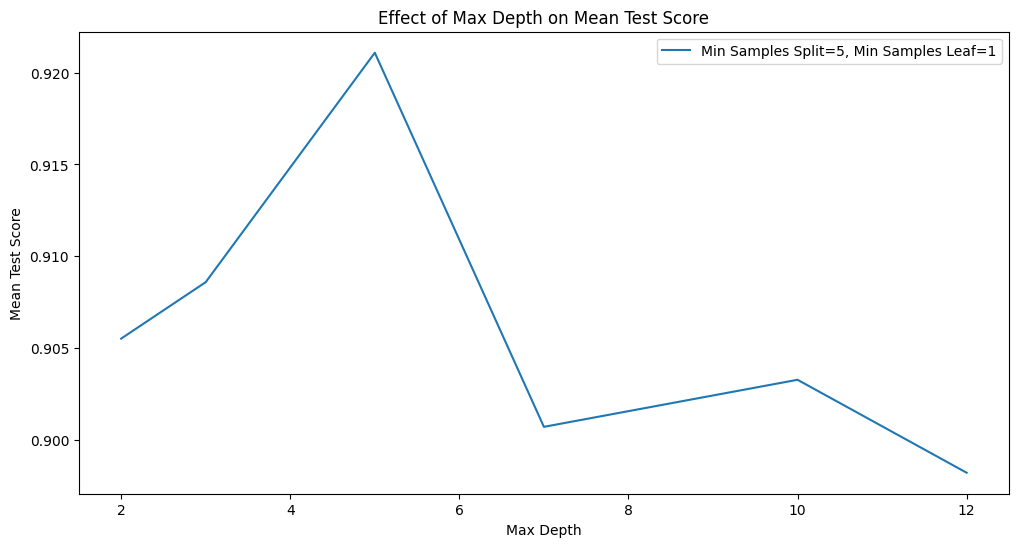

In [19]:
#keep one thing constant and vary other stuff
plt.figure(figsize=(12, 6))
for min_samples_split_val in [best_params['min_samples_split']]:
    for min_samples_leaf_val in [best_params['min_samples_leaf']]:
        subset = res[(res['param_min_samples_split'] == min_samples_split_val) & (res['param_min_samples_leaf'] == min_samples_leaf_val)]
        plt.plot(subset['param_max_depth'], subset['mean_test_score'], label=f'Min Samples Split={min_samples_split_val}, Min Samples Leaf={min_samples_leaf_val}')

plt.title('Effect of Max Depth on Mean Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()

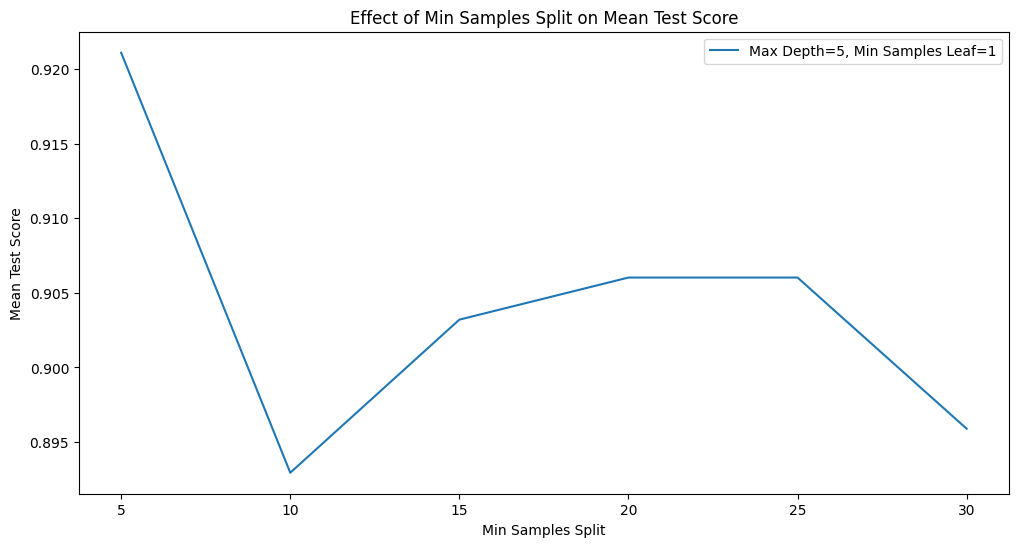

In [20]:
plt.figure(figsize=(12, 6))
for max_depth_val in [best_params['max_depth']]:
    for min_samples_leaf_val in [best_params['min_samples_leaf']]:
        subset = res[(res['param_max_depth'] == max_depth_val) & (res['param_min_samples_leaf'] == min_samples_leaf_val)]
        plt.plot(subset['param_min_samples_split'], subset['mean_test_score'], label=f'Max Depth={max_depth_val}, Min Samples Leaf={min_samples_leaf_val}')
plt.title('Effect of Min Samples Split on Mean Test Score')
plt.xlabel('Min Samples Split')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()



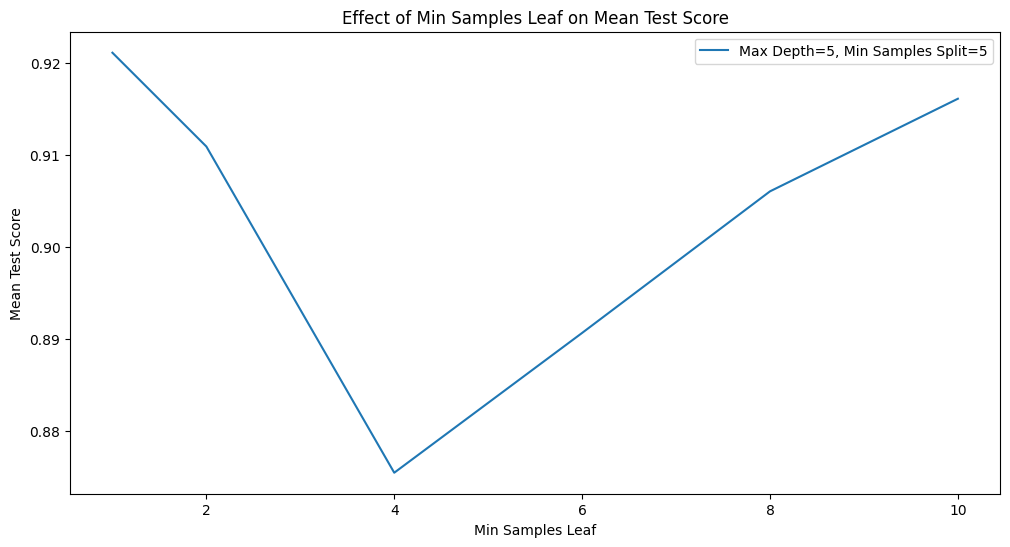

In [21]:
plt.figure(figsize=(12, 6))
for max_depth_val in [best_params['max_depth']]:
    for min_samples_split_val in [best_params['min_samples_split']]:
        subset = res[(res['param_max_depth'] == max_depth_val) & (res['param_min_samples_split'] == min_samples_split_val)]
        plt.plot(subset['param_min_samples_leaf'], subset['mean_test_score'], label=f'Max Depth={max_depth_val}, Min Samples Split={min_samples_split_val}')

plt.title('Effect of Min Samples Leaf on Mean Test Score')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()